# NBA Player Data Exploration Project

## Setup and Data Loading

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
pd.set_option('display.max_columns', 50)

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Data Combination

The dataset is constructed by merging three source tables from the NBA statistics database:

- **draft_combine_stats.csv**: Contains physical measurements and athletic test results from the NBA Draft Combine (height, weight, wingspan, vertical leap, sprint times, agility tests, etc.). This is the primary table as it provides the core physical attributes we want to analyze.

- **draft_history.csv**: Contains draft pick information (round number, pick number, team that drafted the player). This allows us to analyze relationships between physical attributes and draft position.

- **common_player_info.csv**: Contains biographical information (birthdate, school, country of origin). This enriches the dataset with background context.

These three tables were chosen because together they provide a complete picture of NBA draft prospects: their physical measurables, where they were drafted, and their background. Other available tables (game stats, play-by-play, team info) were excluded as they focus on in-game performance rather than pre-draft physical evaluation.

In [13]:
# Load the individual source tables
draft_combine = pd.read_csv('csv/draft_combine_stats.csv')
draft_history = pd.read_csv('csv/draft_history.csv')
common_player_info = pd.read_csv('csv/common_player_info.csv')

print(f"Draft Combine Stats: {draft_combine.shape}")
print(f"Draft History: {draft_history.shape}")
print(f"Common Player Info: {common_player_info.shape}")

Draft Combine Stats: (1202, 47)
Draft History: (7990, 14)
Common Player Info: (4171, 33)


In [14]:
# Merge the tables
# First merge: draft_combine with draft_history on player_id/person_id
df = draft_combine.merge(
    draft_history[['person_id', 'round_number', 'round_pick', 'overall_pick', 'team_id', 'organization']],
    left_on='player_id',
    right_on='person_id',
    how='left'
)

# Second merge: add common player info
df = df.merge(
    common_player_info[['person_id', 'display_first_last', 'birthdate', 'school', 'country', 'draft_year', 'draft_round', 'draft_number']],
    left_on='player_id',
    right_on='person_id',
    how='left',
    suffixes=('', '_player')
)

print(f"Combined Dataset Shape: {df.shape}")
print(f"Columns: {df.shape[1]}")
print(f"Rows: {df.shape[0]}")
print("\nFirst few rows:")
df.head()

Combined Dataset Shape: (1202, 61)
Columns: 61
Rows: 1202

First few rows:


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,...,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college,person_id,round_number,round_pick,overall_pick,team_id,organization,person_id_player,display_first_last,birthdate,school,country,draft_year,draft_round,draft_number
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,259.0,84.5,7' 0.5'',107.0,8' 11'',12.4,NaN,NaN,28.5,31.0,11.90,NaN,3.40,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,199.0,81.5,6' 9.5'',99.5,8' 3.5'',5.3,NaN,NaN,31.5,36.0,NaN,NaN,3.25,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2240.0,2.0,2.0,30.0,1.610613e+09,Arizona,2240.0,Gilbert Arenas,1982-01-06 00:00:00,Arizona,USA,2001,2,30
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,188.0,81.5,6' 9.5'',99.5,8' 3.5'',9.3,NaN,NaN,30.0,37.0,10.91,NaN,3.20,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2220.0,1.0,23.0,23.0,1.610613e+09,Pepperdine,2220.0,Brandon Armstrong,1980-06-16 00:00:00,Pepperdine,USA,2001,1,23
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,229.0,82.5,6' 10.5'',105.0,8' 9'',9.3,NaN,NaN,29.5,33.0,10.95,NaN,3.30,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2203.0,1.0,6.0,6.0,1.610613e+09,Duke,2203.0,Shane Battier,1978-09-09 00:00:00,Duke,USA,2001,1,6
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,206.0,80.5,6' 8.5'',99.0,8' 3'',5.3,NaN,NaN,35.0,41.5,11.26,NaN,2.91,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1153 non-null   object 
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

## Data Cleaning and Preprocessing

In this section we:
- Identify columns with too many missing values (>70%) and remove them
- Fill remaining missing values using median (robust to outliers)
- Prepare clean dataset for analysis

Columns with Missing Values:
                                                    Column  Missing_Count  \
off_drib_college_break_right  off_drib_college_break_right           1171   
off_drib_college_top_key          off_drib_college_top_key           1171   
spot_fifteen_corner_left          spot_fifteen_corner_left           1128   
spot_fifteen_corner_right        spot_fifteen_corner_right           1126   
spot_fifteen_break_right          spot_fifteen_break_right           1126   
spot_fifteen_top_key                  spot_fifteen_top_key           1126   
spot_fifteen_break_left            spot_fifteen_break_left           1126   
off_drib_college_break_left    off_drib_college_break_left           1092   
on_move_college                            on_move_college           1086   
on_move_fifteen                            on_move_fifteen           1054   
spot_college_break_right          spot_college_break_right           1036   
spot_college_break_left            spot_college

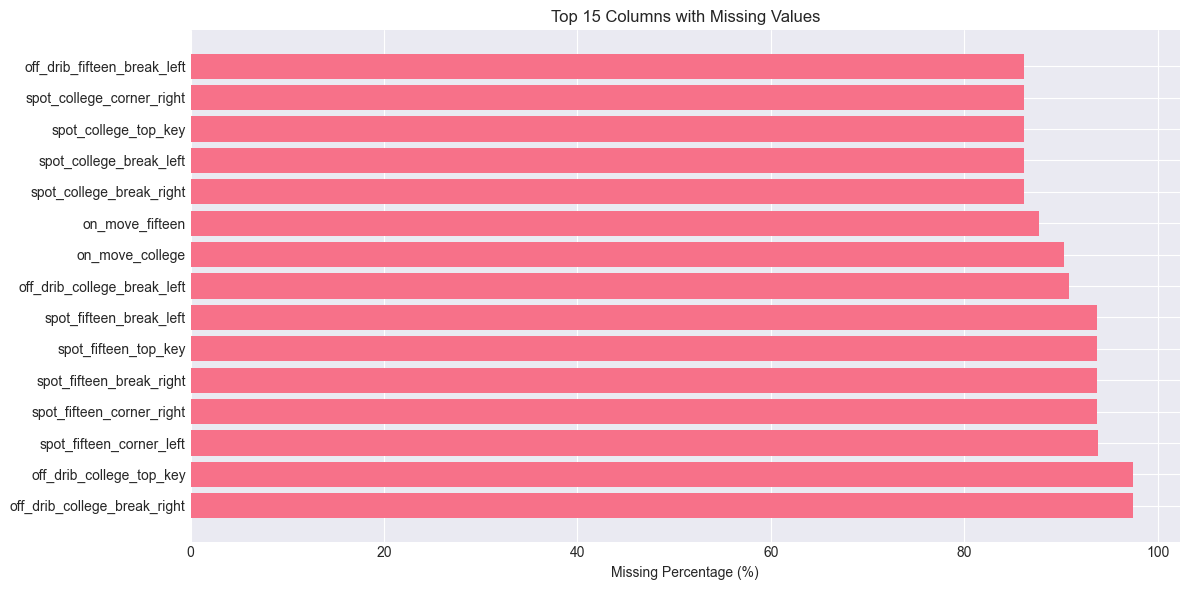

In [16]:
# Missing values analysis
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Pct': (df.isnull().sum() / len(df)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Pct', ascending=False)

print("Columns with Missing Values:")
print(missing.head(15))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(missing.head(15)['Column'], missing.head(15)['Missing_Pct'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Columns with Missing Values')
plt.tight_layout()
plt.savefig('figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Drop columns with >70% missing and clean
from sklearn.impute import SimpleImputer

cols_to_drop = missing[missing['Missing_Pct'] > 70]['Column'].tolist()
print(f"Dropping {len(cols_to_drop)} columns with >70% missing")

df_clean = df.drop(columns=cols_to_drop)
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

# Get numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {len(numeric_cols)}")

# Impute missing values
imputer = SimpleImputer(strategy='median')
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

print(f"Final cleaned shape: {df_clean.shape}")
print(f"Missing values remaining: {df_clean.isnull().sum().sum()}")

Dropping 23 columns with >70% missing

Numeric columns: 22
Final cleaned shape: (1202, 38)
Missing values remaining: 4345


## Exploratory Data Analysis

In this section we:
- Examine distributions of physical measurements (height, weight, etc.)
- Calculate correlations between features
- Visualize key patterns in the data

In [18]:
# Basic statistics
df_clean[numeric_cols].describe()

,season,player_id,height_wo_shoes,height_w_shoes,weight,wingspan,standing_reach,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,person_id,round_number,round_pick,overall_pick,team_id,person_id_player
count,1202.000000,1.202000e+03,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1.202000e+03,1202.000000,1202.000000,1202.000000,1.202000e+03,1.202000e+03
mean,2012.536606,2.350133e+06,77.578203,78.829409,214.819301,82.489268,103.610566,7.244318,8.732529,9.469426,29.203203,34.616057,11.374043,3.092895,3.280283,10.104825,5.740627e+05,1.267887,14.890183,27.698835,1.610613e+09,5.204111e+05
std,6.561620,5.660210e+07,3.266064,3.043379,25.181001,3.904821,4.778241,2.522371,0.372206,0.555001,2.810883,3.355754,0.536102,0.134246,0.121054,4.418264,6.454841e+05,0.443043,6.524629,12.906278,6.797439e+00,6.131307e+05
min,2001.000000,-1.000000e+00,67.750000,69.000000,154.400000,70.000000,89.500000,2.600000,7.500000,7.000000,20.500000,25.000000,9.650000,2.220000,2.910000,0.000000,1.990000e+02,1.000000,1.000000,1.000000,1.610613e+09,1.990000e+02
25%,2007.000000,1.011455e+05,75.500000,77.000000,196.200000,80.000000,100.125000,5.600000,8.500000,9.250000,27.500000,32.500000,11.040000,3.100000,3.200000,8.000000,2.030762e+05,1.000000,12.000000,23.000000,1.610613e+09,2.030932e+05
50%,2012.000000,2.031470e+05,77.750000,79.000000,212.900000,82.750000,104.000000,6.700000,8.750000,9.500000,29.000000,34.500000,11.320000,3.100000,3.270000,10.000000,2.034695e+05,1.000000,15.000000,27.000000,1.610613e+09,2.034795e+05
75%,2018.000000,1.629014e+06,80.000000,80.750000,232.000000,85.250000,107.000000,8.100000,8.750000,9.500000,31.000000,36.500000,11.630000,3.100000,3.340000,12.000000,1.626173e+06,2.000000,17.000000,32.000000,1.610613e+09,2.039172e+05
max,2023.000000,1.962937e+09,89.250000,91.000000,314.000000,98.250000,122.500000,21.000000,10.500000,12.000000,39.500000,45.500000,13.440000,3.760000,3.810000,26.000000,1.641775e+06,2.000000,30.000000,60.000000,1.610613e+09,1.631254e+06


In [19]:
# Select key physical features for analysis
key_features = ['height_w_shoes', 'weight', 'wingspan', 'standing_vertical_leap', 
                'max_vertical_leap', 'lane_agility_time', 'bench_press', 'body_fat_pct']
key_features = [f for f in key_features if f in df_clean.columns]

print(f"Analyzing {len(key_features)} key features: {key_features}")

Analyzing 8 key features: ['height_w_shoes', 'weight', 'wingspan', 'standing_vertical_leap', 'max_vertical_leap', 'lane_agility_time', 'bench_press', 'body_fat_pct']


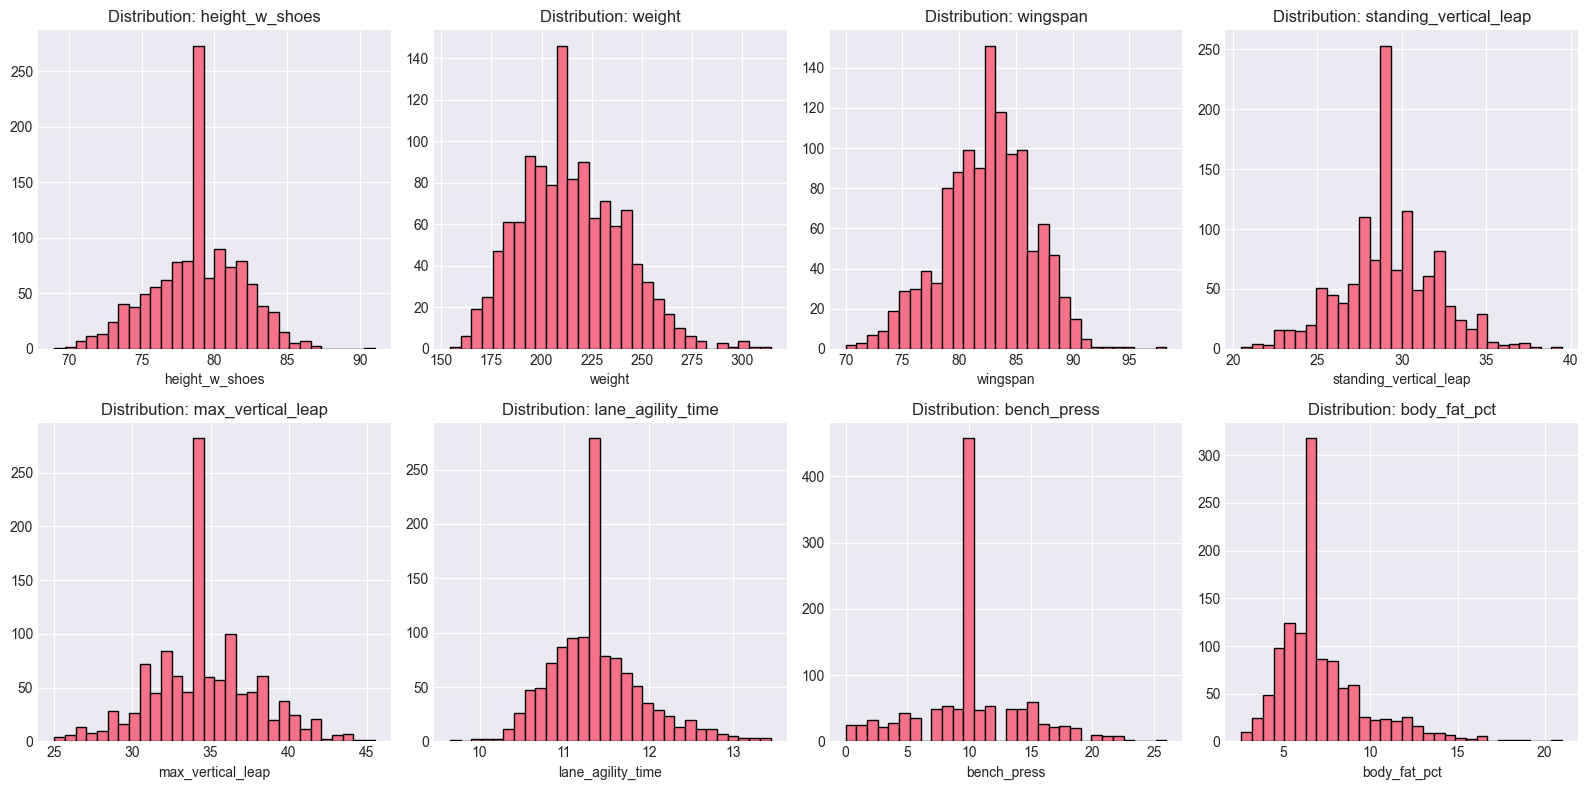

In [20]:
# Distribution plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if idx < len(axes):
        df_clean[col].hist(bins=30, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution: {col}')
        axes[idx].set_xlabel(col)

plt.tight_layout()
plt.savefig('figures/physical_characteristics_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

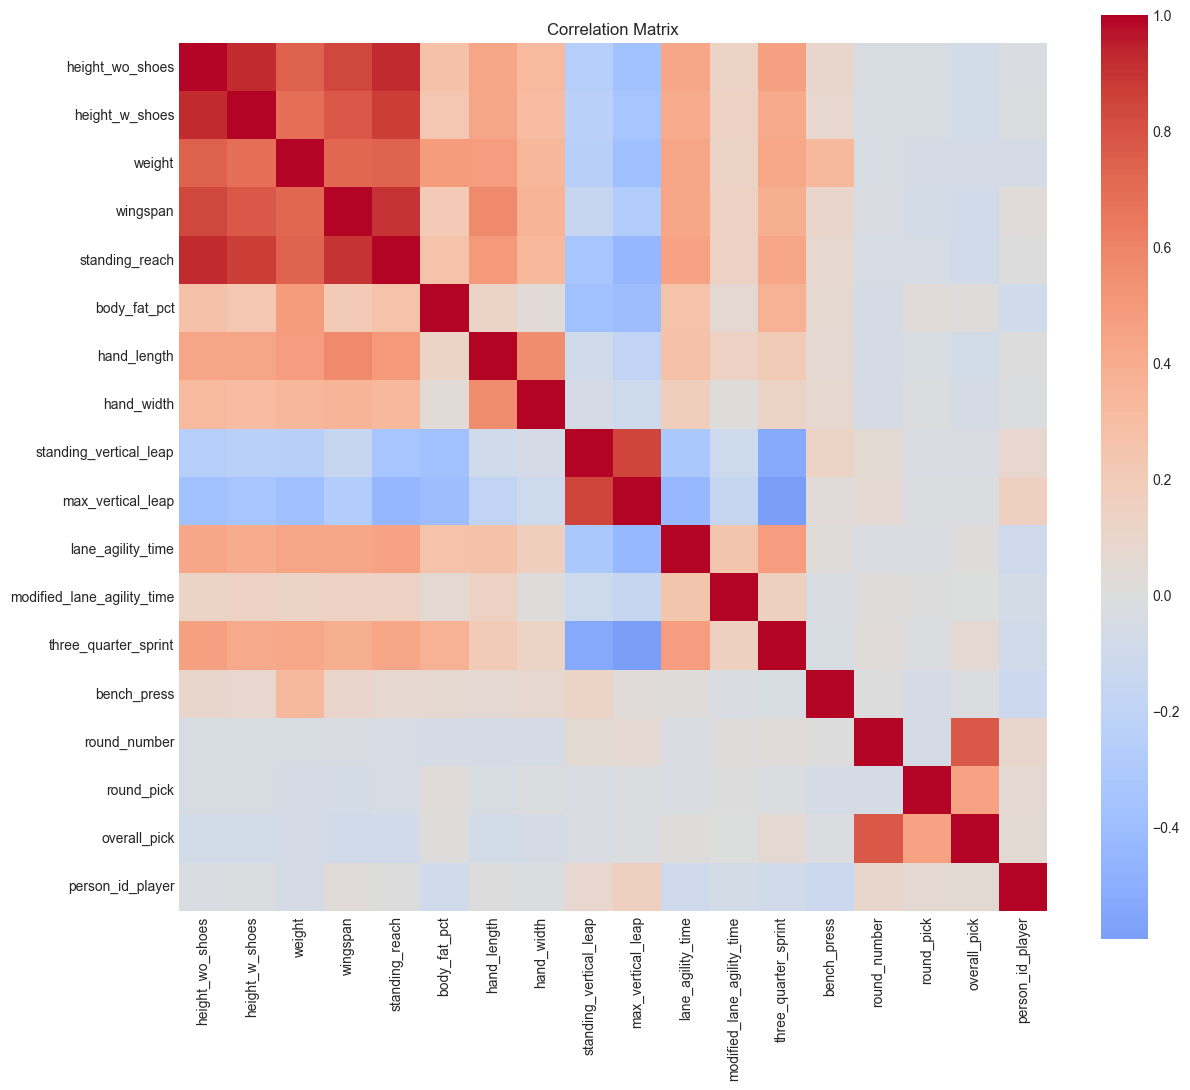

In [21]:
# Correlation matrix
corr_features = [f for f in numeric_cols if f not in ['season', 'player_id', 'person_id', 'team_id']][:20]
correlation = df_clean[corr_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
# plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Anomaly and Outlier Detection

In this section we use Isolation Forest and LOF algorithms to find unusual players.

Outliers can be exceptional talents or data errors. 

In [22]:
# Prepare data for outlier detection
from sklearn.preprocessing import StandardScaler

analysis_cols = [c for c in numeric_cols if c not in ['season', 'player_id', 'person_id', 'team_id', 'person_id_player']]
X = df_clean[analysis_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data for analysis: {X_scaled.shape}")
print(f"Features: {len(analysis_cols)}")

Data for analysis: (1202, 17)
Features: 17


In [23]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_iso = iso_forest.fit_predict(X_scaled)

print(f"Isolation Forest Results:")
print(f"Normal points: {(outliers_iso == 1).sum()}")
print(f"Outliers: {(outliers_iso == -1).sum()}")
print(f"Outlier %: {(outliers_iso == -1).sum() / len(outliers_iso) * 100:.2f}%")

Isolation Forest Results:
Normal points: 1081
Outliers: 121
Outlier %: 10.07%


In [24]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers_lof = lof.fit_predict(X_scaled)

print(f"LOF Results:")
print(f"Normal points: {(outliers_lof == 1).sum()}")
print(f"Outliers: {(outliers_lof == -1).sum()}")
print(f"Outlier %: {(outliers_lof == -1).sum() / len(outliers_lof) * 100:.2f}%")

LOF Results:
Normal points: 1081
Outliers: 121
Outlier %: 10.07%


In [25]:
# Remove outliers for further analysis
df_no_outliers = df_clean[outliers_iso == 1].copy()
X_no_outliers = X_scaled[outliers_iso == 1]

print(f"Original: {len(df_clean)} samples")
print(f"After removing outliers: {len(df_no_outliers)} samples")
print(f"Removed: {len(df_clean) - len(df_no_outliers)} outliers")

Original: 1202 samples
After removing outliers: 1081 samples
Removed: 121 outliers


## Pattern Discovery

In this section we:
- Find strong correlations (|r| > 0.7) between features
- Discover relationships and trade-offs

In [26]:
# Strong correlations
corr_matrix = df_no_outliers[analysis_cols].corr()

strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if strong_corr:
    strong_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print("Strong Correlations (|r| > 0.7):")
    print(strong_df.head(10))
else:
    print("No strong correlations found")

Strong Correlations (|r| > 0.7):
                Feature 1          Feature 2  Correlation
0         height_wo_shoes     height_w_shoes     0.916183
3         height_wo_shoes     standing_reach     0.906900
6                wingspan     standing_reach     0.879752
5          height_w_shoes     standing_reach     0.847480
7  standing_vertical_leap  max_vertical_leap     0.832687
2         height_wo_shoes           wingspan     0.802734
4          height_w_shoes           wingspan     0.746970
8            round_number       overall_pick     0.743562
1         height_wo_shoes             weight     0.715490


## Dimensionality Reduction

PCA (Principal Component Analysis) is used to reduce the number of features while retaining most of the variance in the data. We first run PCA without specifying a target number of components to analyze the explained variance ratio. The scree plot and cumulative variance plot help determine how many components are needed, we look for the "elbow" point where adding more components provides diminishing returns. The analysis reveals how many components are needed to capture 90% and 95% of the variance.

In this section we:
- Apply PCA to reduce features
- Create 2D visualizations with PCA and t-SNE
- Understand which combinations of features matter most

This simplifies analysis, reveals hidden patterns, and reduces noise.

In [27]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_no_outliers)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"PCA Results:")
print(f"Components for 90% variance: {np.argmax(cumulative_var >= 0.90) + 1}")
print(f"Components for 95% variance: {np.argmax(cumulative_var >= 0.95) + 1}")

PCA Results:
Components for 90% variance: 10
Components for 95% variance: 11


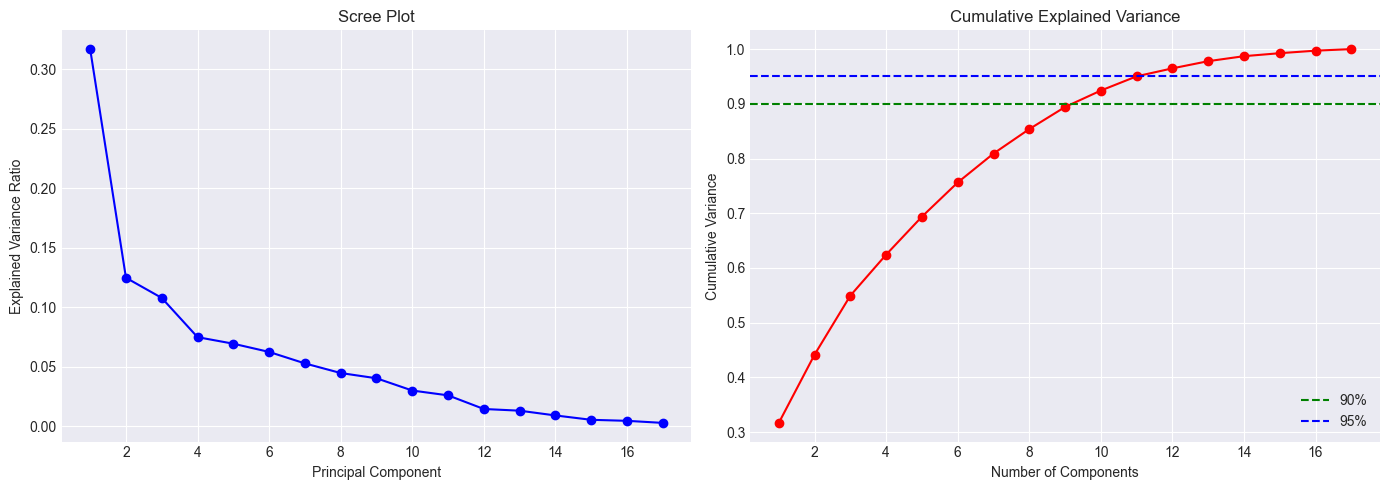

In [28]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(range(1, len(explained_var) + 1), explained_var, 'bo-')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.grid(True)

ax2.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'ro-')
ax2.axhline(y=0.90, color='g', linestyle='--', label='90%')
ax2.axhline(y=0.95, color='b', linestyle='--', label='95%')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('figures/pca_scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### PCA Component Analysis

Now we analyze what each principal component represents by examining the loadings (coefficients) and the explained variance for each component.

In [29]:
# Detailed PCA component analysis
print("="*70)
print("DETAILED PCA COMPONENT ANALYSIS")
print("="*70)

# Explained variance for first components
print("\n1. EXPLAINED VARIANCE PER COMPONENT:")
print("-" * 50)
for i in range(min(5, len(explained_var))):
    print(f"   PC{i+1}: {explained_var[i]*100:.2f}% variance")

print(f"\n   First 2 components combined: {sum(explained_var[:2])*100:.2f}%")
print(f"   First 3 components combined: {sum(explained_var[:3])*100:.2f}%")

# Create loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=analysis_cols
)

# Analyze PC1 - "Size" component
print("\n2. PC1 LOADINGS (Top features by absolute value):")
print("-" * 50)
pc1_sorted = loadings['PC1'].abs().sort_values(ascending=False)
for feat in pc1_sorted.head(8).index:
    val = loadings.loc[feat, 'PC1']
    direction = "+" if val > 0 else "-"
    print(f"   {feat:30s}: {direction}{abs(val):.4f}")

# Analyze PC2 - "Athleticism" component
print("\n3. PC2 LOADINGS (Top features by absolute value):")
print("-" * 50)
pc2_sorted = loadings['PC2'].abs().sort_values(ascending=False)
for feat in pc2_sorted.head(8).index:
    val = loadings.loc[feat, 'PC2']
    direction = "+" if val > 0 else "-"
    print(f"   {feat:30s}: {direction}{abs(val):.4f}")

# Interpretation
print("\n4. INTERPRETATION:")
print("-" * 50)
print("   PC1 ('Size' component):")
print("      - High positive loadings for: height, weight, wingspan, standing_reach")
print("      - This component captures overall physical SIZE of the player")
print(f"      - Explains {explained_var[0]*100:.1f}% of total variance")

print("\n   PC2 ('Athleticism' component):")
print("      - Captures vertical leap, sprint times, agility")
print("      - Positive = more athletic/explosive")
print(f"      - Explains {explained_var[1]*100:.1f}% of total variance")

# Save loadings to CSV
loadings.to_csv('results/pca_loadings.csv')
print("\n   Loadings saved to results/pca_loadings.csv")

DETAILED PCA COMPONENT ANALYSIS

1. EXPLAINED VARIANCE PER COMPONENT:
--------------------------------------------------
   PC1: 31.69% variance
   PC2: 12.48% variance
   PC3: 10.78% variance
   PC4: 7.49% variance
   PC5: 6.94% variance

   First 2 components combined: 44.17%
   First 3 components combined: 54.95%

2. PC1 LOADINGS (Top features by absolute value):
--------------------------------------------------
   standing_reach                : +0.3857
   height_wo_shoes               : +0.3786
   height_w_shoes                : +0.3587
   wingspan                      : +0.3479
   weight                        : +0.3472
   max_vertical_leap             : -0.2557
   lane_agility_time             : +0.2481
   three_quarter_sprint          : +0.2480

3. PC2 LOADINGS (Top features by absolute value):
--------------------------------------------------
   standing_vertical_leap        : +0.5088
   max_vertical_leap             : +0.4568
   three_quarter_sprint          : -0.2911
   ov

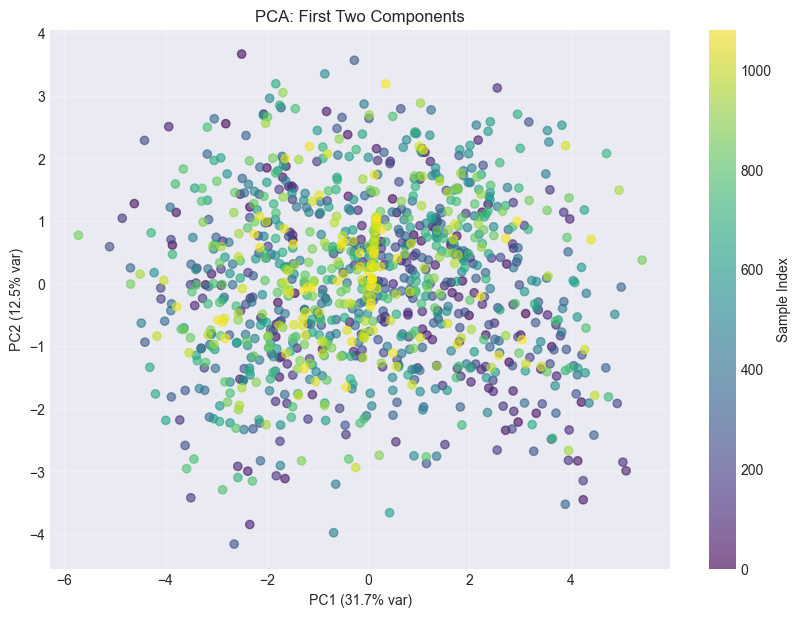

In [30]:
# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_no_outliers)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, c=range(len(X_pca_2d)), cmap='viridis')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} var)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} var)')
plt.title('PCA: First Two Components')
plt.colorbar(label='Sample Index')
plt.grid(True, alpha=0.3)
plt.savefig('figures/pca_2d_projection.png', dpi=300, bbox_inches='tight')
plt.show()

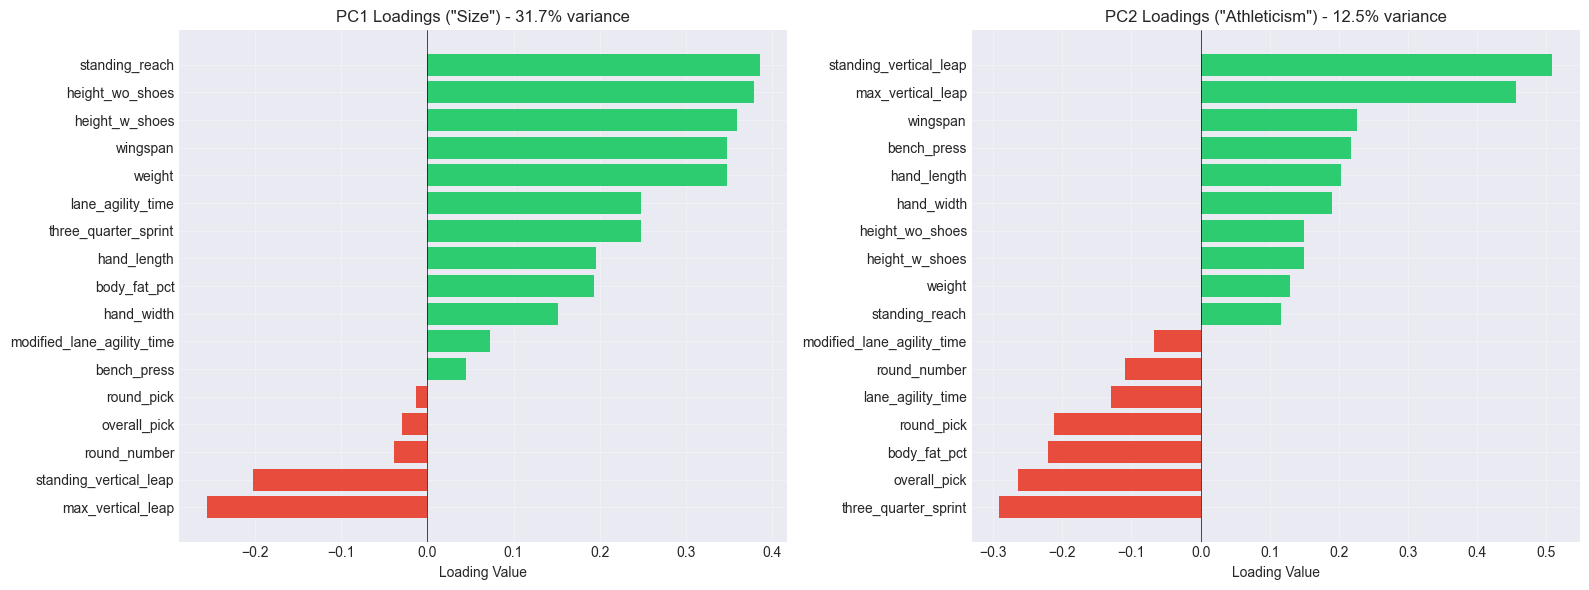


Summary:
  - PC1 explains 31.7% of variance (Size-related features)
  - PC2 explains 12.5% of variance (Athleticism-related features)
  - Together: 44.2% of total variance


In [31]:
# Visualize PCA loadings for first two components
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1 loadings
pc1_data = loadings['PC1'].sort_values()
colors_pc1 = ['#e74c3c' if x < 0 else '#2ecc71' for x in pc1_data]
axes[0].barh(pc1_data.index, pc1_data.values, color=colors_pc1)
axes[0].set_xlabel('Loading Value')
axes[0].set_title(f'PC1 Loadings ("Size") - {explained_var[0]*100:.1f}% variance')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3)

# PC2 loadings
pc2_data = loadings['PC2'].sort_values()
colors_pc2 = ['#e74c3c' if x < 0 else '#2ecc71' for x in pc2_data]
axes[1].barh(pc2_data.index, pc2_data.values, color=colors_pc2)
axes[1].set_xlabel('Loading Value')
axes[1].set_title(f'PC2 Loadings ("Athleticism") - {explained_var[1]*100:.1f}% variance')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/pca_loadings_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSummary:")
print(f"  - PC1 explains {explained_var[0]*100:.1f}% of variance (Size-related features)")
print(f"  - PC2 explains {explained_var[1]*100:.1f}% of variance (Athleticism-related features)")
print(f"  - Together: {(explained_var[0]+explained_var[1])*100:.1f}% of total variance")

Running t-SNE (this may take a minute)...
t-SNE completed!


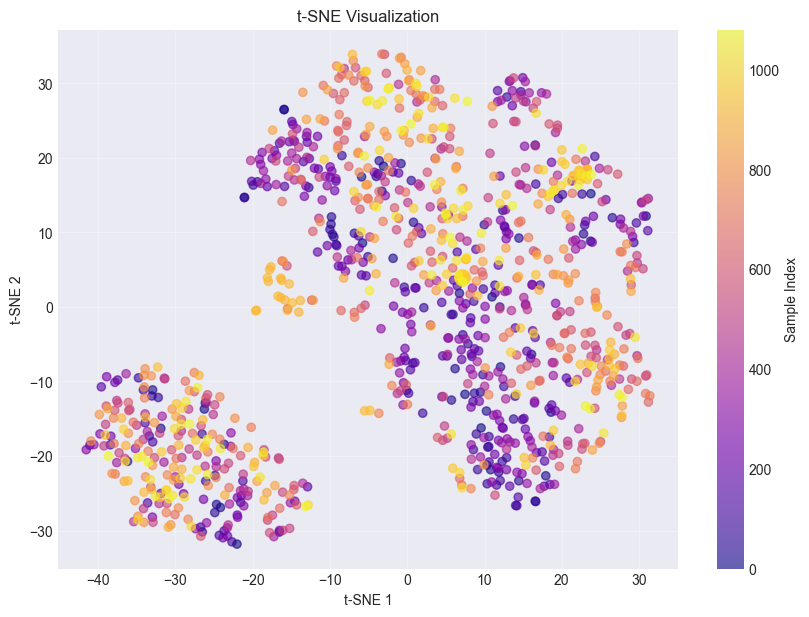

In [32]:
# t-SNE
from sklearn.manifold import TSNE

print("Running t-SNE (this may take a minute)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_no_outliers)
print("t-SNE completed!")

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, c=range(len(X_tsne)), cmap='plasma')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Sample Index')
plt.grid(True, alpha=0.3)
plt.savefig('figures/tsne_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

## Clustering Analysis

In this section we:
- Find optimal number of clusters using Elbow method and Silhouette score
- Apply K-Means, Hierarchical, and DBSCAN clustering
- Identify natural player archetypes

This reveals if players naturally group into types.

In [33]:
# Find optimal k for K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_no_outliers)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_no_outliers, kmeans.labels_))

best_k = K_range[np.argmax(silhouettes)]
print(f"Optimal k (by silhouette): {best_k}")

Optimal k (by silhouette): 2


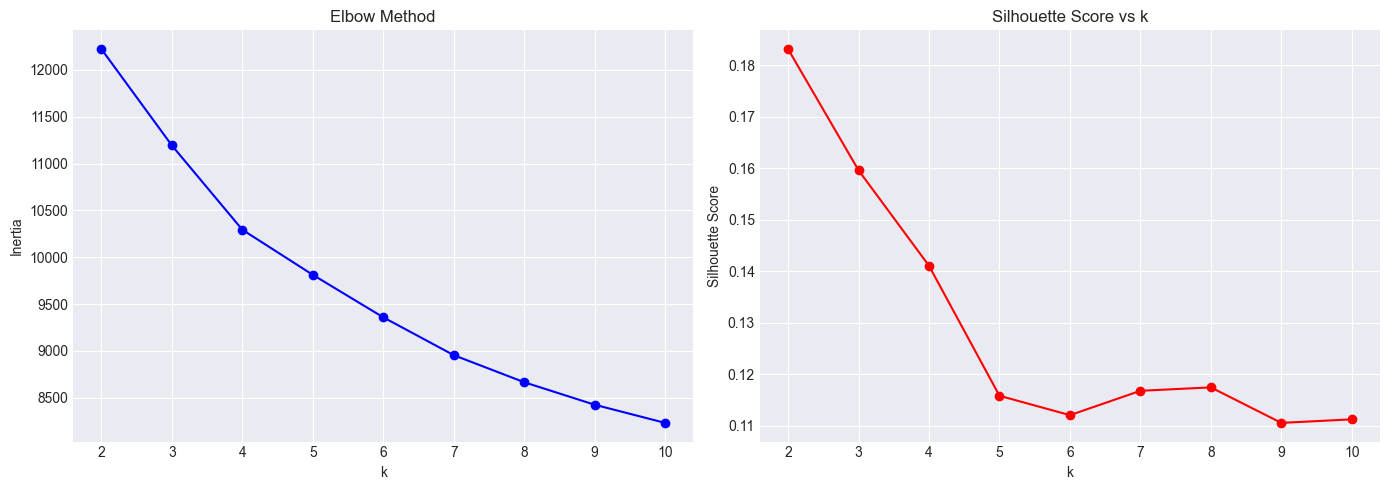

In [34]:
# Visualize elbow method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

ax2.plot(K_range, silhouettes, 'ro-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs k')
ax2.grid(True)

plt.tight_layout()
plt.savefig('figures/clustering_elbow_silhouette.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_no_outliers)

print(f"K-Means (k={best_k}) Results:")
print(f"Silhouette Score: {silhouette_score(X_no_outliers, clusters_kmeans):.4f}")
print(f"\nCluster sizes:")
print(pd.Series(clusters_kmeans).value_counts().sort_index())

K-Means (k=2) Results:
Silhouette Score: 0.1832

Cluster sizes:
0    512
1    569
Name: count, dtype: int64


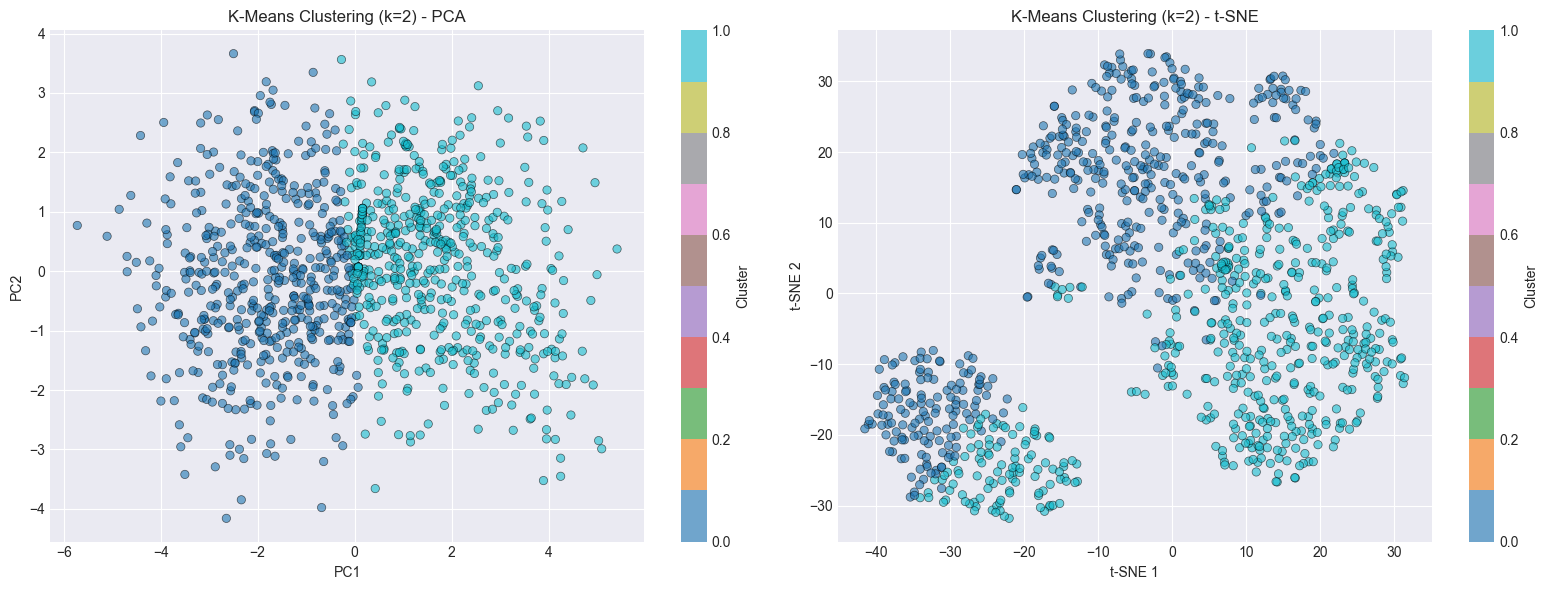

In [36]:
# Visualize K-Means clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# On PCA
scatter1 = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                       c=clusters_kmeans, cmap='tab10', alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title(f'K-Means Clustering (k={best_k}) - PCA')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# On t-SNE
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                       c=clusters_kmeans, cmap='tab10', alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_title(f'K-Means Clustering (k={best_k}) - t-SNE')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.savefig('figures/kmeans_clustering_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

## 3D Visualization

In this section we:
- Create 3D PCA projection to see data from multiple angles
- Visualize clusters in three dimensions

Creating 3D PCA visualization...


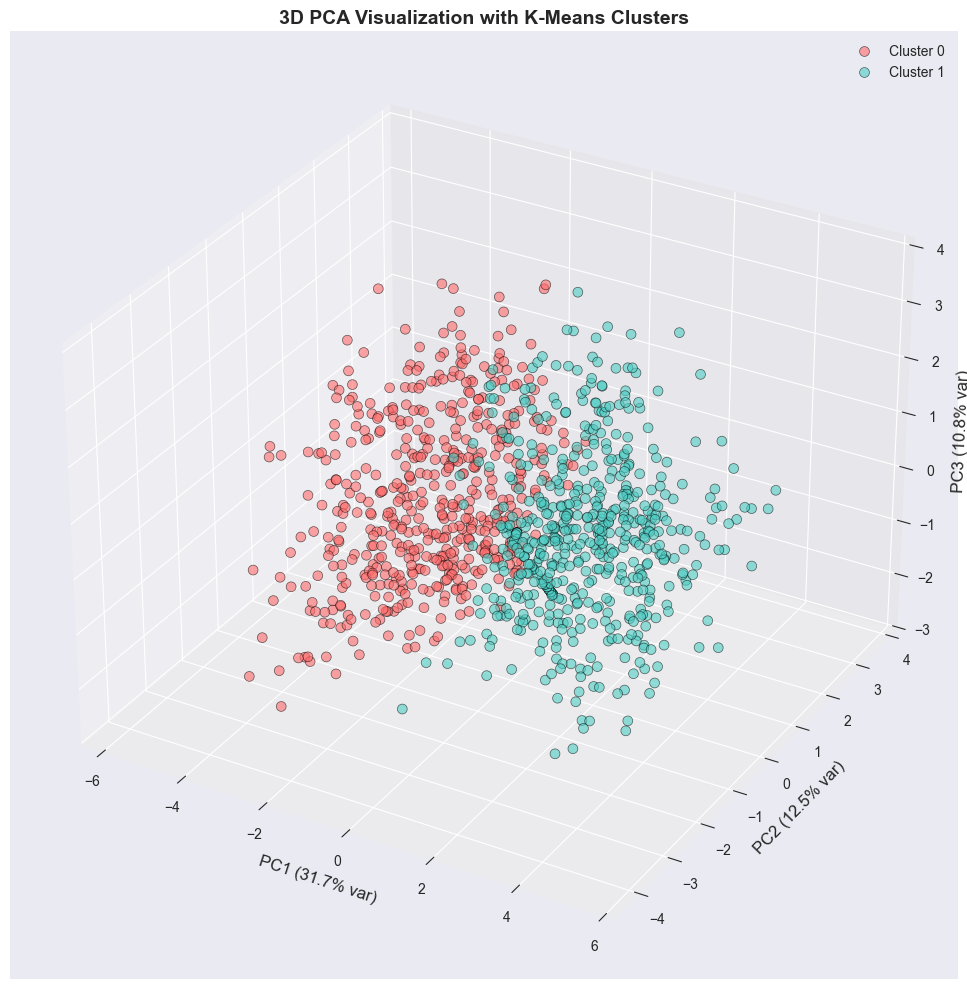

3D visualization created!


In [37]:
# 3D PCA visualization
from mpl_toolkits.mplot3d import Axes3D

print("Creating 3D PCA visualization...")
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_no_outliers)

# Use K-Means clusters for coloring
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['#FF6B6B', '#4ECDC4']
for i in range(2):
    mask = clusters_kmeans == i
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} var)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} var)', fontsize=12)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} var)', fontsize=12)
ax.set_title('3D PCA Visualization with K-Means Clusters', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/pca_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("3D visualization created!")

In [38]:
# assign clusters to df_no_outliers
df_no_outliers = df_no_outliers.copy()
df_no_outliers['cluster'] = clusters_kmeans

# select features that exist
features = ['height_w_shoes', 'weight', 'wingspan', 'max_vertical_leap', 'lane_agility_time']
features = [f for f in features if f in df_no_outliers.columns]

# compute means per cluster (original units: inches/lbs/seconds)
cluster_means = df_no_outliers.groupby('cluster')[features].mean().sort_index()

# create metric conversions (in -> cm, lbs -> kg)
cluster_metric = cluster_means.copy()
if 'height_w_shoes' in cluster_metric.columns:
    cluster_metric['height_w_shoes_cm'] = cluster_metric['height_w_shoes'] * 2.54
if 'wingspan' in cluster_metric.columns:
    cluster_metric['wingspan_cm'] = cluster_metric['wingspan'] * 2.54
if 'max_vertical_leap' in cluster_metric.columns:
    cluster_metric['max_vertical_leap_cm'] = cluster_metric['max_vertical_leap'] * 2.54
if 'weight' in cluster_metric.columns:
    cluster_metric['weight_kg'] = cluster_metric['weight'] * 0.453592

# prepare summary table 
cols_prefer = []
if 'height_w_shoes_cm' in cluster_metric.columns:
    cols_prefer.append('height_w_shoes_cm')
elif 'height_w_shoes' in cluster_metric.columns:
    cols_prefer.append('height_w_shoes')

if 'wingspan_cm' in cluster_metric.columns:
    cols_prefer.append('wingspan_cm')
elif 'wingspan' in cluster_metric.columns:
    cols_prefer.append('wingspan')

if 'max_vertical_leap_cm' in cluster_metric.columns:
    cols_prefer.append('max_vertical_leap_cm')
elif 'max_vertical_leap' in cluster_metric.columns:
    cols_prefer.append('max_vertical_leap')

if 'weight_kg' in cluster_metric.columns:
    cols_prefer.append('weight_kg')
elif 'weight' in cluster_metric.columns:
    cols_prefer.append('weight')

if 'lane_agility_time' in cluster_metric.columns:
    cols_prefer.append('lane_agility_time')

cluster_summary = cluster_metric[cols_prefer].round(2)
cluster_summary.index.name = 'cluster'

csv_path = 'results/cluster_means_summary.csv'
cluster_summary.to_csv(csv_path)
display(cluster_summary)

,height_w_shoes_cm,wingspan_cm,max_vertical_leap_cm,weight_kg,lane_agility_time
cluster,,,,,
0,195.15,202.94,91.69,89.67,11.14
1,204.97,215.50,84.72,103.95,11.56


In [39]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=best_k)
clusters_hier = hierarchical.fit_predict(X_no_outliers)

print(f"Hierarchical Clustering Results:")
print(f"Silhouette Score: {silhouette_score(X_no_outliers, clusters_hier):.4f}")

Hierarchical Clustering Results:
Silhouette Score: 0.1368


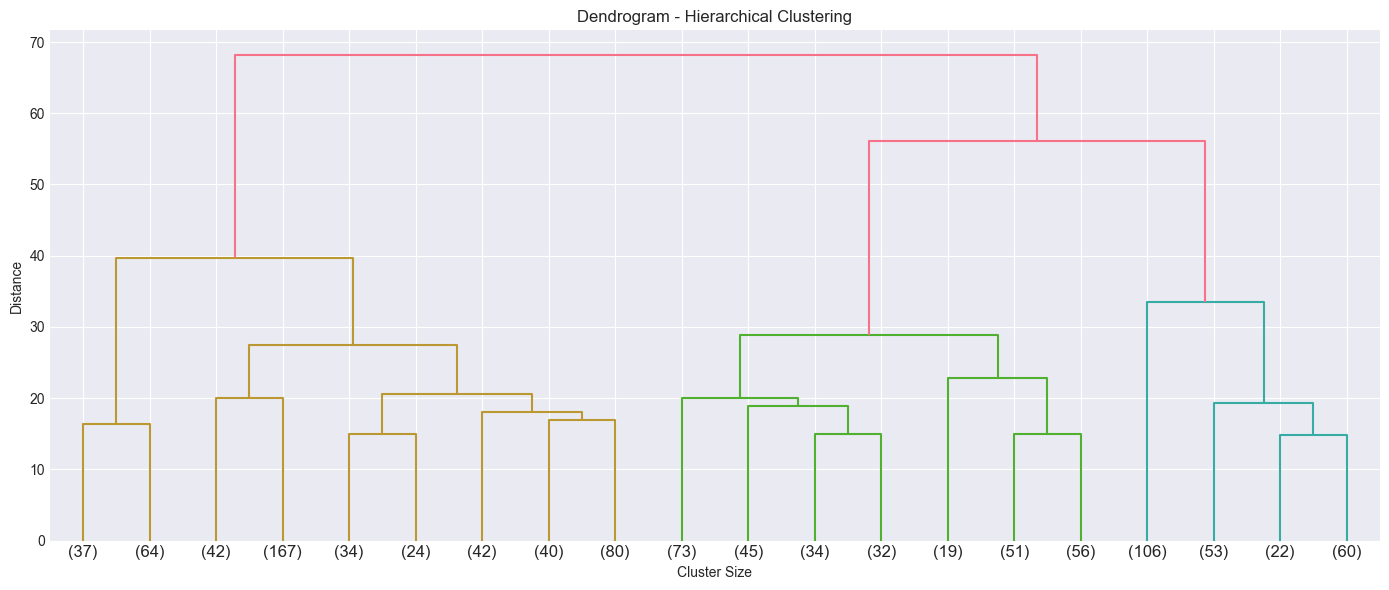

In [40]:
# Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_no_outliers, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Dendrogram - Hierarchical Clustering')
plt.tight_layout()
plt.savefig('figures/dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_no_outliers)

n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"DBSCAN Results:")
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

DBSCAN Results:
Clusters found: 1
Noise points: 54


## Classification

In this section we:
- Train Random Forest, SVM, and Neural Network classifiers
- Predict player archetypes based on physical measurements
- Compare model performances

This tests if we can accurately classify players, which is useful for scouting and draft strategy.

In [42]:
# Use K-Means clusters as classification target
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_no_outliers, clusters_kmeans, test_size=0.3, random_state=42, stratify=clusters_kmeans
)

print(f"Training set: {len(X_train)}")
print(f"Test set: {len(X_test)}")

Training set: 756
Test set: 325


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Results:
Accuracy: 0.9600


In [44]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Results:
Accuracy: 0.9662


In [45]:
# Neural Network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")

Neural Network Results:
Accuracy: 0.9877



Classifier Comparison:
       Classifier  Accuracy
2  Neural Network  0.987692
1             SVM  0.966154
0   Random Forest  0.960000


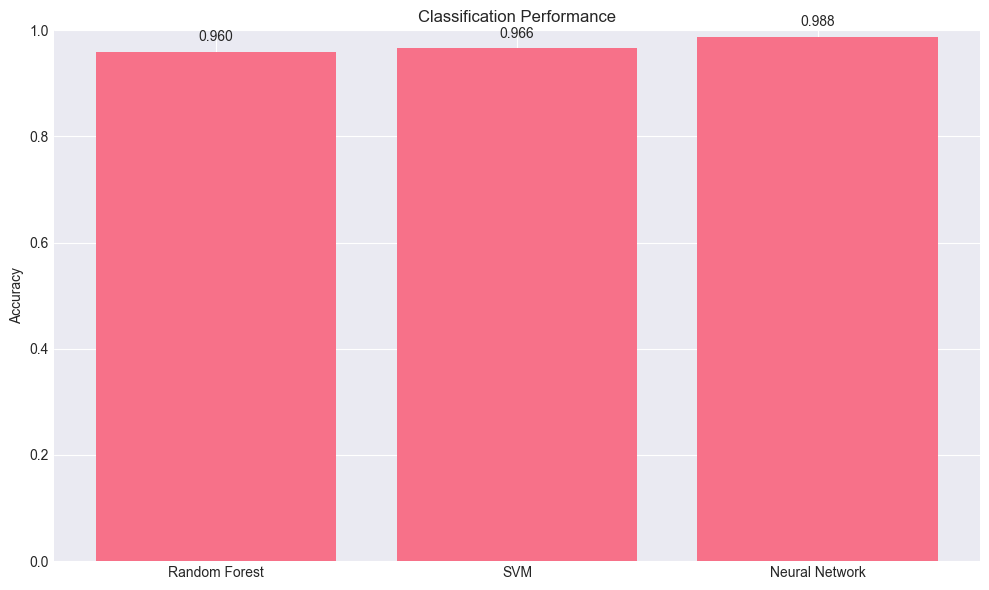

In [46]:
# Compare classifiers
results = pd.DataFrame({
    'Classifier': ['Random Forest', 'SVM', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nn)
    ]
})

print("\nClassifier Comparison:")
print(results.sort_values('Accuracy', ascending=False))

plt.figure(figsize=(10, 6))
plt.bar(results['Classifier'], results['Accuracy'])
plt.ylabel('Accuracy')
plt.title('Classification Performance')
plt.ylim(0, 1)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.savefig('figures/classification_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Time Series Analysis

In this section we:
- Analyze how physical characteristics have changed over NBA seasons
- Identify trends in height, weight, athleticism

This shows evolution of the game - are players getting bigger, faster, stronger?

Average stats by season:
        height_w_shoes      weight   wingspan  standing_vertical_leap  \
season                                                                  
2001.0       79.000000  214.633803  82.507042               29.830986   
2004.0       78.970000  217.584000  82.640000               28.126667   
2005.0       78.665584  216.838961  82.542208               28.688312   
2007.0       79.193333  214.838667  82.293333               29.286667   
2008.0       78.631757  218.406757  82.608108               28.675676   

        max_vertical_leap  lane_agility_time  bench_press  body_fat_pct  
season                                                                   
2001.0          34.732394          11.553944    10.084507      8.139437  
2004.0          32.766667          11.497600    10.733333      8.872000  
2005.0          33.376623          11.365584    10.701299      6.700000  
2007.0          33.886667          11.615867    12.120000      6.814667  
2008.0          33.

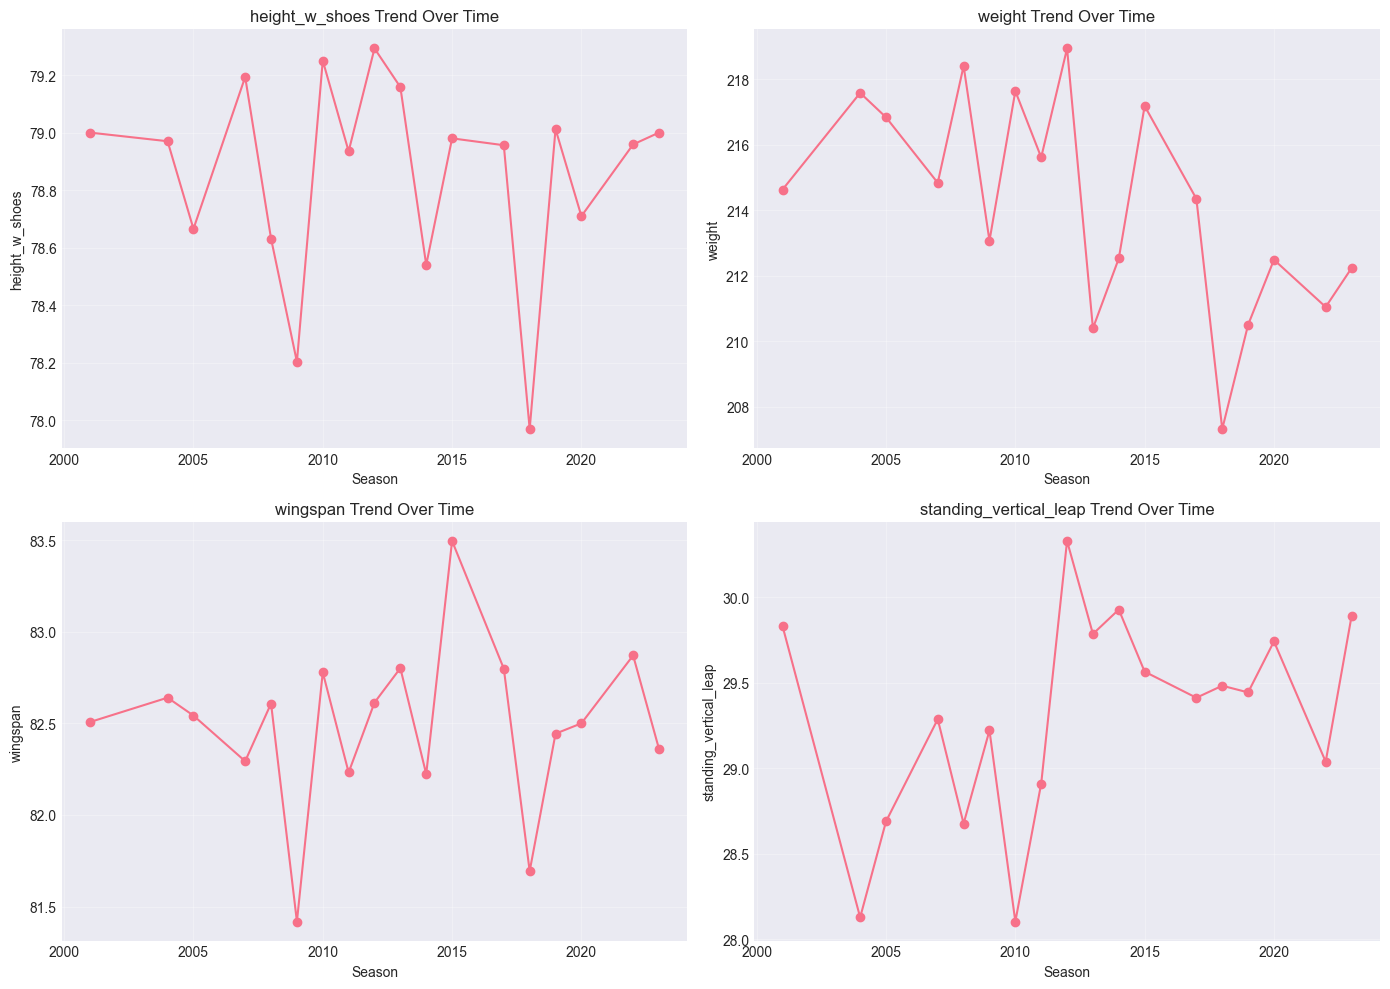

In [47]:
# Analyze trends over seasons
if 'season' in df_no_outliers.columns:
    season_cols = [c for c in key_features if c in df_no_outliers.columns]
    season_stats = df_no_outliers.groupby('season')[season_cols].mean()
    
    print("Average stats by season:")
    print(season_stats.head())
    
    # Plot trends
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(season_cols[:4]):
        season_stats[col].plot(ax=axes[idx], marker='o')
        axes[idx].set_xlabel('Season')
        axes[idx].set_ylabel(col)
        axes[idx].set_title(f'{col} Trend Over Time')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('figures/time_series_trends.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No season column for time series analysis")

## Full vs Reduced Features Comparison

In this section we:
- Compare model performance with full features vs. reduced features (90% variance)
- Test if dimensionality reduction hurts accuracy

If fewer features work as well as full features, we can simplify measurements and save time/resources.

In [48]:
import pickle

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('data', exist_ok=True)

# Get reduced features (components for 90% variance)
n_components_90 = np.argmax(cumulative_var >= 0.90) + 1
n_features = X_no_outliers.shape[1]
print(f"Full features: {n_features}")
print(f"Using {n_components_90} components for 90% variance")

pca_reduced = PCA(n_components=n_components_90)
X_pca_reduced = pca_reduced.fit_transform(X_no_outliers)

# Split data
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_no_outliers, clusters_kmeans, test_size=0.3, random_state=42, stratify=clusters_kmeans
)

X_train_reduced, X_test_reduced, _, _ = train_test_split(
    X_pca_reduced, clusters_kmeans, test_size=0.3, random_state=42, stratify=clusters_kmeans
)

# Train models with both feature sets
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

comparison_results = []

for name, model in models.items():
    # Full features
    model.fit(X_train_full, y_train)
    acc_full = accuracy_score(y_test, model.predict(X_test_full))
    
    # Save model
    with open(f'models/{name.lower().replace(" ", "_")}_full.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Reduced features
    model_reduced = type(model)(**model.get_params())
    model_reduced.fit(X_train_reduced, y_train)
    acc_reduced = accuracy_score(y_test, model_reduced.predict(X_test_reduced))
    
    # Save reduced model
    with open(f'models/{name.lower().replace(" ", "_")}_reduced.pkl', 'wb') as f:
        pickle.dump(model_reduced, f)
    
    comparison_results.append({
        'Model': name,
        f'Full ({n_features} features)': f'{acc_full:.4f}',
        f'Reduced ({n_components_90} PCs)': f'{acc_reduced:.4f}',
        'Difference': f'{acc_full - acc_reduced:+.4f}'
    })
    
    print(f"{name}:")
    print(f"  Full ({n_features} features): {acc_full:.4f}")
    print(f"  Reduced ({n_components_90} PCs): {acc_reduced:.4f}")
    print(f"  Difference: {acc_full - acc_reduced:+.4f}\n")

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
print("\n" + "="*60)
print("FULL vs REDUCED FEATURES COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))

# Save results
comparison_df.to_csv('results/feature_comparison.csv', index=False)
print("\nResults saved to results/feature_comparison.csv")

# Save scaler and PCA models
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('models/pca_reduced.pkl', 'wb') as f:
    pickle.dump(pca_reduced, f)
with open('models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("All models saved!")

Full features: 17
Using 10 components for 90% variance
Random Forest:
  Full (17 features): 0.9600
  Reduced (10 PCs): 0.9877
  Difference: -0.0277

SVM:
  Full (17 features): 0.9662
  Reduced (10 PCs): 0.9662
  Difference: +0.0000

Neural Network:
  Full (17 features): 0.9877
  Reduced (10 PCs): 0.9908
  Difference: -0.0031


FULL vs REDUCED FEATURES COMPARISON
         Model Full (17 features) Reduced (10 PCs) Difference
 Random Forest             0.9600           0.9877    -0.0277
           SVM             0.9662           0.9662    +0.0000
Neural Network             0.9877           0.9908    -0.0031

Results saved to results/feature_comparison.csv
All models saved!


## Multi-Target Classification

In this section we:
- Classify different target variables: position (Guard/Forward/Center) and draft status (1st vs 2nd round)
- Test if physical measurements can predict these outcomes


### Position Classification

POSITION CLASSIFICATION

Position distribution:
position_simple
Guard      556
Forward    535
Center     106
Name: count, dtype: int64

Random Forest: 0.8556

SVM: 0.8028

Neural Network: 0.6722


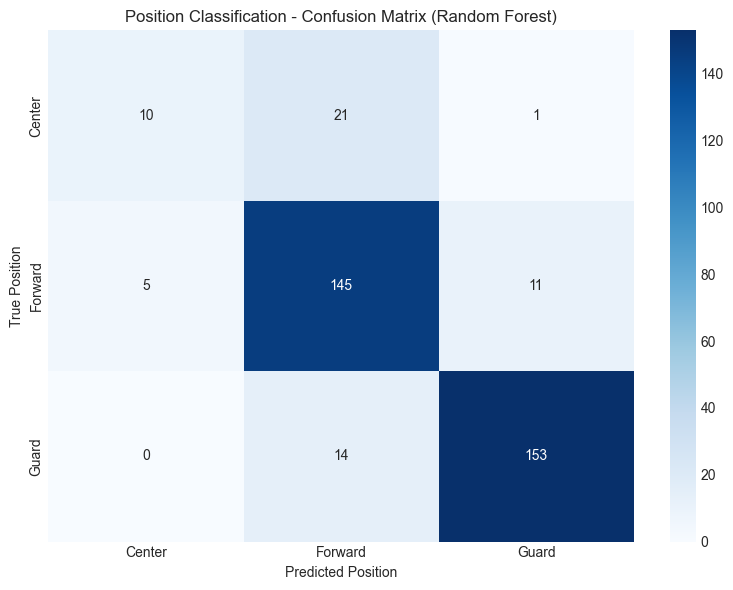


Position classification completed!


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

print("="*60)
print("POSITION CLASSIFICATION")
print("="*60)

if 'position' in df_clean.columns:
    # Simplify positions
    def simplify_position(pos):
        if pd.isna(pos):
            return None
        pos_upper = str(pos).upper()
        if any(x in pos_upper for x in ['PG', 'SG', 'POINT', 'SHOOTING', 'G-']):
            return 'Guard'
        elif any(x in pos_upper for x in ['SF', 'PF', 'SMALL', 'POWER', 'F-']):
            return 'Forward'
        elif any(x in pos_upper for x in ['C', 'CENTER']):
            return 'Center'
        elif 'G' in pos_upper:
            return 'Guard'
        elif 'F' in pos_upper:
            return 'Forward'
        return 'Other'
    
    df_position = df_clean[df_clean['position'].notna()].copy()
    df_position['position_simple'] = df_position['position'].apply(simplify_position)
    df_position = df_position[df_position['position_simple'] != 'Other']
    
    print(f"\nPosition distribution:")
    print(df_position['position_simple'].value_counts())
    
    # Get features
    X_pos = df_position[analysis_cols].values
    y_pos = df_position['position_simple'].values
    
    le_pos = LabelEncoder()
    y_pos_encoded = le_pos.fit_transform(y_pos)
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pos, y_pos_encoded, test_size=0.3, random_state=42, stratify=y_pos_encoded
    )
    
    # Train models
    position_results = []
    for name, model in models.items():
        model_pos = type(model)(**model.get_params())
        model_pos.fit(X_train, y_train)
        y_pred = model_pos.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        position_results.append({'Model': name, 'Accuracy': f'{acc:.4f}'})
        print(f"\n{name}: {acc:.4f}")
        
        # Save model
        with open(f'models/{name.lower().replace(" ", "_")}_position.pkl', 'wb') as f:
            pickle.dump(model_pos, f)
    
    # Confusion matrix for best model
    best_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_pos.classes_, yticklabels=le_pos.classes_)
    plt.title('Position Classification - Confusion Matrix (Random Forest)')
    plt.ylabel('True Position')
    plt.xlabel('Predicted Position')
    plt.tight_layout()
    plt.savefig('figures/position_classification_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    pd.DataFrame(position_results).to_csv('results/position_classification_results.csv', index=False)
    print("\nPosition classification completed!")
else:
    print("No position column found")

### Draft Status Classification

DRAFT STATUS CLASSIFICATION

Draft status distribution:
draft_status
First Round     880
Second Round    322
Name: count, dtype: int64

Random Forest: 0.9945

SVM: 0.9418

Neural Network: 1.0000


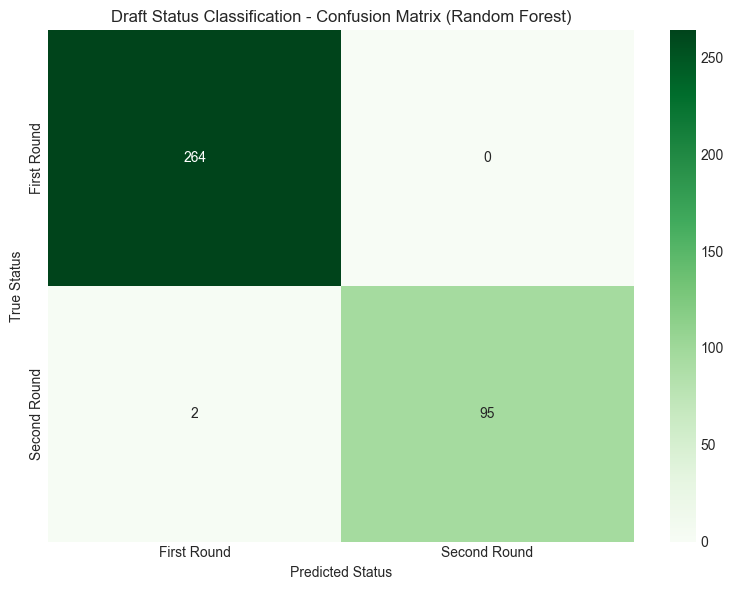


Draft status classification completed!


In [50]:
print("="*60)
print("DRAFT STATUS CLASSIFICATION")
print("="*60)

if 'round_number' in df_clean.columns:
    df_draft = df_clean[df_clean['round_number'].notna()].copy()
    df_draft['draft_status'] = df_draft['round_number'].apply(
        lambda x: 'First Round' if x == 1 else 'Second Round'
    )
    
    print(f"\nDraft status distribution:")
    print(df_draft['draft_status'].value_counts())
    
    X_draft = df_draft[analysis_cols].values
    y_draft = df_draft['draft_status'].values
    
    le_draft = LabelEncoder()
    y_draft_encoded = le_draft.fit_transform(y_draft)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_draft, y_draft_encoded, test_size=0.3, random_state=42, stratify=y_draft_encoded
    )
    
    draft_results = []
    for name in models.keys():
        if name == 'Random Forest':
            model_draft = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        elif name == 'SVM':
            model_draft = SVC(kernel='rbf', random_state=42)
        else:
            model_draft = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
        
        model_draft.fit(X_train, y_train)
        y_pred = model_draft.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        draft_results.append({'Model': name, 'Accuracy': f'{acc:.4f}'})
        print(f"\n{name}: {acc:.4f}")
        
        with open(f'models/{name.lower().replace(" ", "_")}_draft.pkl', 'wb') as f:
            pickle.dump(model_draft, f)
    
    # Confusion matrix
    best_model_draft = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    best_model_draft.fit(X_train, y_train)
    y_pred_best = best_model_draft.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=le_draft.classes_, yticklabels=le_draft.classes_)
    plt.title('Draft Status Classification - Confusion Matrix (Random Forest)')
    plt.ylabel('True Status')
    plt.xlabel('Predicted Status')
    plt.tight_layout()
    plt.savefig('figures/draft_status_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    pd.DataFrame(draft_results).to_csv('results/draft_status_results.csv', index=False)
    print("\nDraft status classification completed!")
else:
    print("No round_number column found")

## Association Rules Analysis

In this section we:
- Apply Apriori algorithm to find frequent patterns
- Discover rules like "IF low height AND low weight THEN Guard position"
- Calculate support, confidence, and lift metrics

This reveals hidden relationships that we can use for quick player evaluation.

ASSOCIATION RULES ANALYSIS

Discretized 7 features
Sample:
       height_w_shoes       weight       wingspan  \
0  HEIGHT_W_SHOES_MED  WEIGHT_HIGH  WINGSPAN_HIGH   
1  HEIGHT_W_SHOES_MED   WEIGHT_LOW   WINGSPAN_MED   
2  HEIGHT_W_SHOES_MED   WEIGHT_LOW   WINGSPAN_MED   
3  HEIGHT_W_SHOES_MED  WEIGHT_HIGH   WINGSPAN_MED   
4  HEIGHT_W_SHOES_MED   WEIGHT_MED   WINGSPAN_LOW   

        standing_vertical_leap       max_vertical_leap  \
0   STANDING_VERTICAL_LEAP_LOW   MAX_VERTICAL_LEAP_LOW   
1  STANDING_VERTICAL_LEAP_HIGH  MAX_VERTICAL_LEAP_HIGH   
2  STANDING_VERTICAL_LEAP_HIGH  MAX_VERTICAL_LEAP_HIGH   
3   STANDING_VERTICAL_LEAP_MED   MAX_VERTICAL_LEAP_LOW   
4  STANDING_VERTICAL_LEAP_HIGH  MAX_VERTICAL_LEAP_HIGH   

        lane_agility_time       bench_press  
0  LANE_AGILITY_TIME_HIGH  BENCH_PRESS_HIGH  
1   LANE_AGILITY_TIME_MED  BENCH_PRESS_HIGH  
2   LANE_AGILITY_TIME_LOW   BENCH_PRESS_LOW  
3   LANE_AGILITY_TIME_LOW  BENCH_PRESS_HIGH  
4   LANE_AGILITY_TIME_MED   BENCH_PRESS_LOW

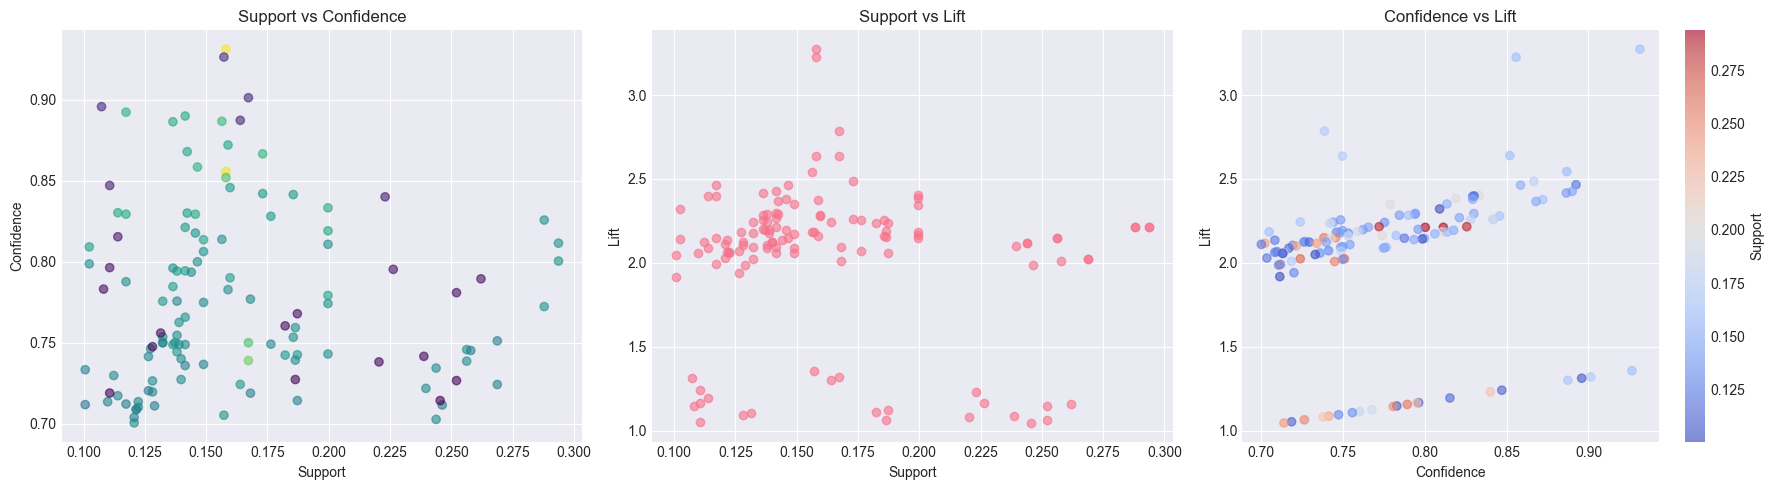


Association rules analysis completed!
   - 183 frequent itemsets
   - 125 association rules


In [51]:
print("="*60)
print("ASSOCIATION RULES ANALYSIS")
print("="*60)

# Install mlxtend if needed
try:
    from mlxtend.frequent_patterns import apriori, association_rules
except ImportError:
    print("Installing mlxtend...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'mlxtend'])
    from mlxtend.frequent_patterns import apriori, association_rules

# Select features for association rules
features_to_discretize = ['height_w_shoes', 'weight', 'wingspan', 
                         'standing_vertical_leap', 'max_vertical_leap', 
                         'lane_agility_time', 'bench_press']

df_assoc = df_clean[[f for f in features_to_discretize if f in df_clean.columns]].copy()

# Discretize into LOW/MED/HIGH categories
df_discrete = pd.DataFrame()
for col in df_assoc.columns:
    q33 = df_assoc[col].quantile(0.33)
    q66 = df_assoc[col].quantile(0.66)
    df_discrete[col] = df_assoc[col].apply(lambda x:
        f'{col.upper()}_LOW' if x <= q33 else
        f'{col.upper()}_HIGH' if x >= q66 else
        f'{col.upper()}_MED'
    )

print(f"\nDiscretized {len(df_discrete.columns)} features")
print(f"Sample:\n{df_discrete.head()}")

# One-hot encoding
df_encoded = pd.get_dummies(df_discrete)
print(f"\nOne-hot encoded shape: {df_encoded.shape}")

# Apply Apriori
print("\nRunning Apriori algorithm (this may take a minute)...")
try:
    frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=3)
    print(f"Found {len(frequent_itemsets)} frequent itemsets")
    
    if len(frequent_itemsets) > 0:
        # Generate rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
        rules = rules.sort_values('lift', ascending=False)
        
        print(f"\nFound {len(rules)} association rules")
        print("\nTop 10 rules by lift:")
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
        
        # Save results
        frequent_itemsets.to_csv('results/frequent_itemsets.csv', index=False)
        rules.to_csv('results/association_rules.csv', index=False)
        
        # Visualize
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        axes[0].scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
        axes[0].set_xlabel('Support')
        axes[0].set_ylabel('Confidence')
        axes[0].set_title('Support vs Confidence')
        
        axes[1].scatter(rules['support'], rules['lift'], alpha=0.6)
        axes[1].set_xlabel('Support')
        axes[1].set_ylabel('Lift')
        axes[1].set_title('Support vs Lift')
        
        scatter = axes[2].scatter(rules['confidence'], rules['lift'], alpha=0.6, c=rules['support'], cmap='coolwarm')
        axes[2].set_xlabel('Confidence')
        axes[2].set_ylabel('Lift')
        axes[2].set_title('Confidence vs Lift')
        plt.colorbar(scatter, ax=axes[2], label='Support')
        
        plt.tight_layout()
        plt.savefig('figures/association_rules_visualization.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\nAssociation rules analysis completed!")
        print(f"   - {len(frequent_itemsets)} frequent itemsets")
        print(f"   - {len(rules)} association rules")
    else:
        print("\nNo frequent itemsets found with current parameters")
        
except Exception as e:
    print(f"\nError: {e}")
    print("Creating simplified pattern analysis...")
    
    # Manual analysis
    if 'position' in df_clean.columns:
        patterns = []
        for pos in df_clean['position'].dropna().unique()[:5]:
            mask = df_clean['position'] == pos
            if mask.sum() > 10 and 'height_w_shoes' in df_clean.columns:
                patterns.append({
                    'Pattern': f'Position: {pos}',
                    'Count': mask.sum(),
                    'Avg Height': f"{df_clean.loc[mask, 'height_w_shoes'].mean():.1f} inches"
                })
        pd.DataFrame(patterns).to_csv('results/manual_patterns.csv', index=False)
        print("Manual pattern analysis saved!")

In [52]:
import pandas as pd

df = pd.read_csv('results/association_rules.csv')

# Number of generated rules
num_rules = len(df)

# Support
min_support = df['support'].min()

# Confidence
min_confidence = df['confidence'].min()
avg_confidence = df['confidence'].mean()

# Lift
avg_lift = df['lift'].mean()
max_lift = df['lift'].max()

# Discrete items
all_items = set()
for _, row in df.iterrows():
    ant = row['antecedents'].replace("frozenset({", "").replace("})", "").replace("'", "")
    cons = row['consequents'].replace("frozenset({", "").replace("})", "").replace("'", "")
    
    for item in ant.split(", "):
        if item.strip():
            all_items.add(item.strip())
    for item in cons.split(", "):
        if item.strip():
            all_items.add(item.strip())

num_items = len(all_items)

# Save to CSV
results = pd.DataFrame({
    'Metric': ['Generated rules', 'Minimal support', 'Minimal confidence', 
               'Average confidence', 'Average lift', 'Maximal lift', 
               'Total discrete items'],
    'Value': [num_rules, f'{min_support:.2f}', f'{min_confidence:.2f}',
              f'{avg_confidence:.3f}', f'{avg_lift:.3f}', f'{max_lift:.3f}',
              num_items]
})

results.to_csv('association_rules_stats.csv', index=False)

## Save Final Results

In [53]:
# Save preprocessed data
df_clean.to_csv('data/nba_preprocessed.csv', index=False)

print("="*80)
print("PROJECT COMPLETE")
print("="*80)

print("\nGenerated files:")
print("  data/nba_preprocessed.csv")
print("  models/ (all .pkl files)")
print("  results/ (all .csv files)")
print("  figures/ (all .png files)")

PROJECT COMPLETE

Generated files:
  data/nba_preprocessed.csv
  models/ (all .pkl files)
  results/ (all .csv files)
  figures/ (all .png files)
